### Importing Data

In [ ]:
# !pip install factor_analyzer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pip install sunbird

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

## plots
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from sklearn.tree import plot_tree

# from sunbird.categorical_encoding import frequency_encoding

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## importing model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Descriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## Canonical Correlation Relation:
from sklearn.cross_decomposition import CCA

## ensemble methid
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Import other necessary libraries
from sklearn.multiclass import OneVsRestClassifier

## dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize, LabelEncoder

## CV
from sklearn.model_selection import StratifiedKFold

## imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

from collections import Counter

# import factor_analyzer
# from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer

import xgboost as xgb
from xgboost import XGBClassifier

## Importing metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score

import warnings
# Disable warnings
warnings.filterwarnings("ignore")

## Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, Sequential

In [ ]:
ICMR_data = pd.read_csv('/content/drive/MyDrive/Multivariate Project: ICMR Cancer Data/Data/data.csv')
ICMR_labels = pd.read_csv('/content/drive/MyDrive/Multivariate Project: ICMR Cancer Data/Data/labels.csv')
ICMR_data = pd.concat([ICMR_data,ICMR_labels], axis = 1)
ICMR_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Unnamed: 0,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,sample_0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,sample_1,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,sample_2,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,sample_3,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,sample_4,BRCA


In [ ]:
ICMR_data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Unnamed: 0,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,sample_0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,sample_1,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,sample_2,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,sample_3,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,sample_4,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,sample_796,BRCA
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,sample_797,LUAD
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,sample_798,COAD
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,sample_799,PRAD


In [ ]:
ICMR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20534 entries, Unnamed: 0 to Class
dtypes: float64(20531), object(3)
memory usage: 125.5+ MB


In [ ]:
ICMR_data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [ ]:
ICMR_data = ICMR_data.drop(['Unnamed: 0', 'Unnamed: 0'], axis =1)

In [ ]:
count = list(ICMR_data['Class'].value_counts())
count

[300, 146, 141, 136, 78]

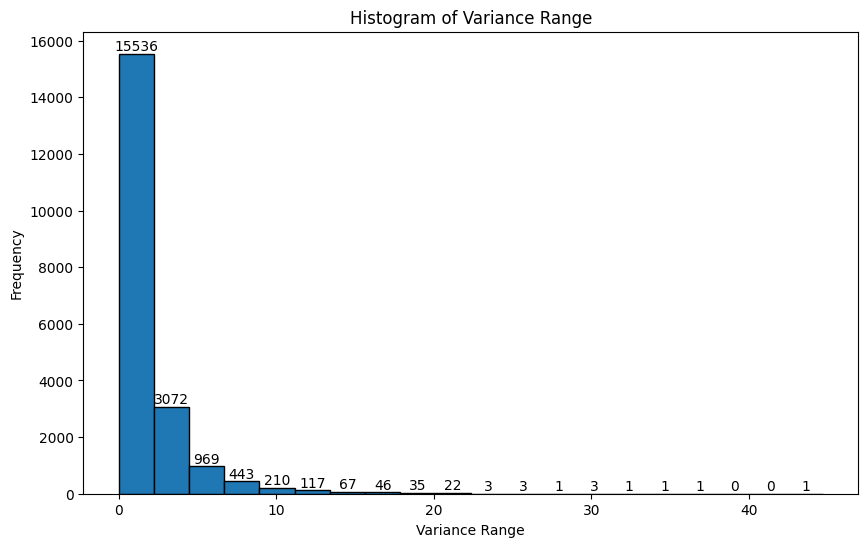

In [ ]:

# Calculate the variances
variances = np.var(ICMR_data, axis=0)

# Calculate the range of variances
variance_range = variances.max() - variances.min()

# Create a histogram of variances
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the histogram with custom bins and colors
n, bins, patches = plt.hist(variances, bins=20, range=(variances.min(), variances.max()), edgecolor='k')

# Add counts on top of each bar
for count, patch in zip(n, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 10, str(int(count)),
             ha='center', va='bottom')

plt.xlabel('Variance Range')
plt.ylabel('Frequency')
plt.title('Histogram of Variance Range')
plt.show()


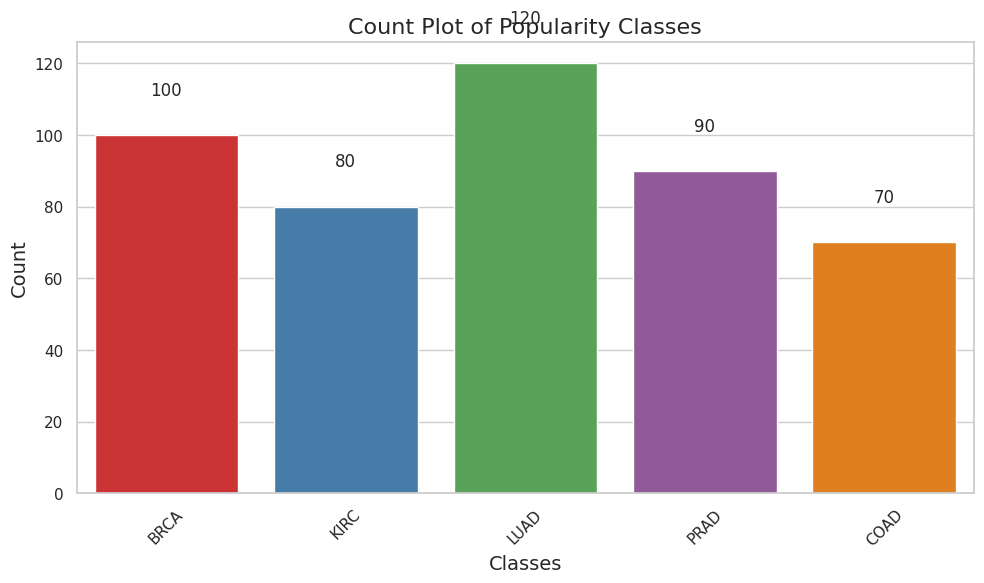

In [ ]:
# Sample data for class names and count
class_names = ["BRCA", "KIRC", "LUAD", "PRAD", "COAD"]
count = [100, 80, 120, 90, 70]  # Example count values for each class

# Customizing colors using the "Set1" palette
colors = sns.color_palette("Set1")

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set a whitegrid background

# Create the bar plot with custom colors
bars = sns.barplot(x=class_names, y=count, palette=colors)

# Adding data labels on top of the bars
for bar, count in zip(bars.patches, count):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(count), ha='center', va='bottom', fontsize=12)

# Add a title and labels
plt.title("Count Plot of Popularity Classes", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# drpping meaning less columns
ICMR_data.columns


Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20532)

In [ ]:
ICMR_filtered_data = ICMR_data

In [ ]:
ICMR_filtered_data.isnull().sum()

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20532, dtype: int64

In [ ]:
ICMR_filtered_data.duplicated().sum()

0

In [ ]:

ICMR_filtered_data = ICMR_filtered_data.drop_duplicates()
ICMR_filtered_data = ICMR_filtered_data.dropna()

### 2. Applying Dimension Reduction Technique:
#### 2.1 PCA

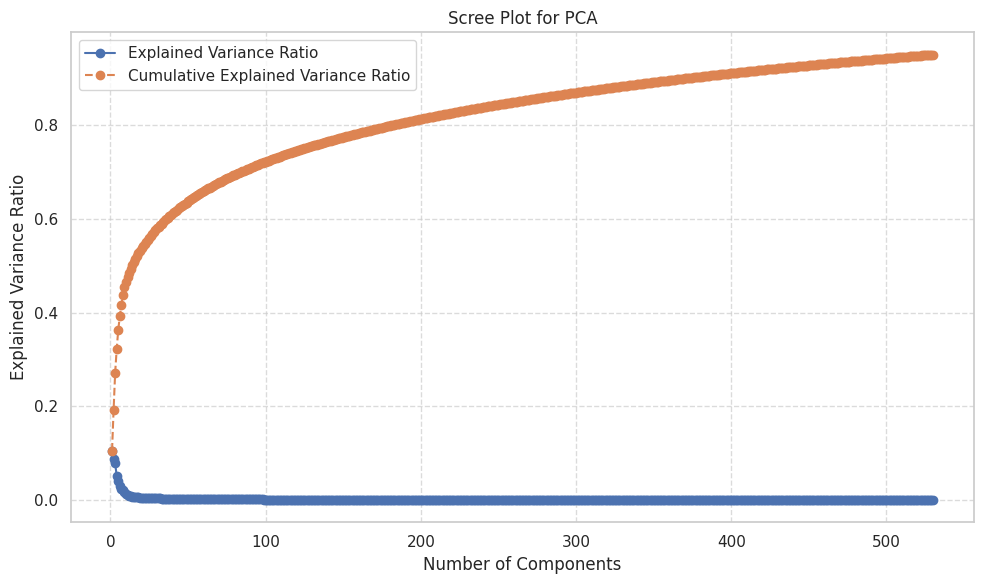

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ICMR_filtered_data.drop(['Class'], axis=1))  # Use fit_transform instead of fit

## Explanability = 95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
principle_components = pca.components_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Rest of your plotting code remains the same


# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')

# Add labels and title
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.legend(['Explained Variance Ratio', 'Cumulative Explained Variance Ratio'])

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.7)
# plt.xticks(range(1, len(explained_variance_ratio) + 1))

# Show the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Plot of the PC 1 and PC 2 and Tumors')

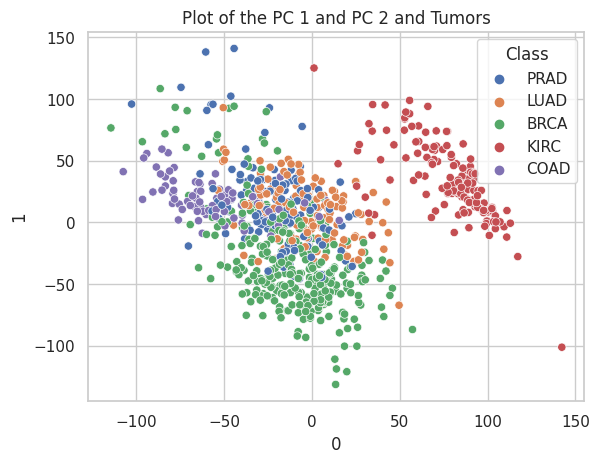

In [ ]:
class_df = pd.DataFrame(ICMR_filtered_data['Class'])

class_df= class_df['Class']
class_df
class_df.columns = ["class"]

df_pca = pd.concat([pd.DataFrame(X_pca), class_df], axis =1)
# df_pca_99['cancer_type']=df_pca['Class']
# Present the data on the 5 clusters using seaborn maps
sns.scatterplot(x=0,y=1, hue = "Class",data=df_pca)
# plt.grid()
plt.title("Plot of the PC 1 and PC 2 and Tumors")

Text(0.5, 1.0, 'Plot of the PCA 2 and Tumors')

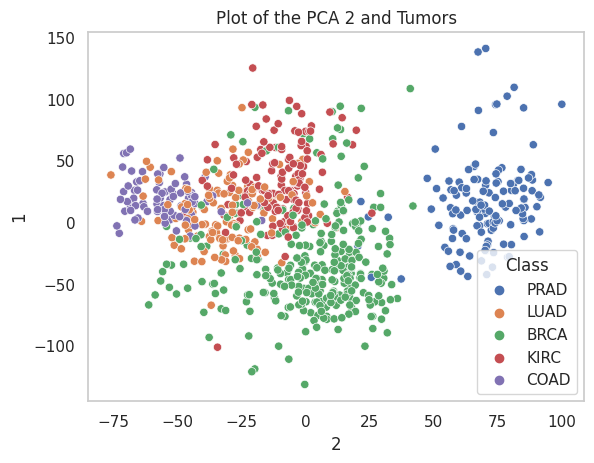

In [ ]:
sns.scatterplot(x=2,y=1, hue = "Class",data=df_pca)
plt.grid()
plt.title("Plot of the PCA 2 and Tumors")

Text(0.5, 1.0, 'Plot of the PCA 2 and Tumors')

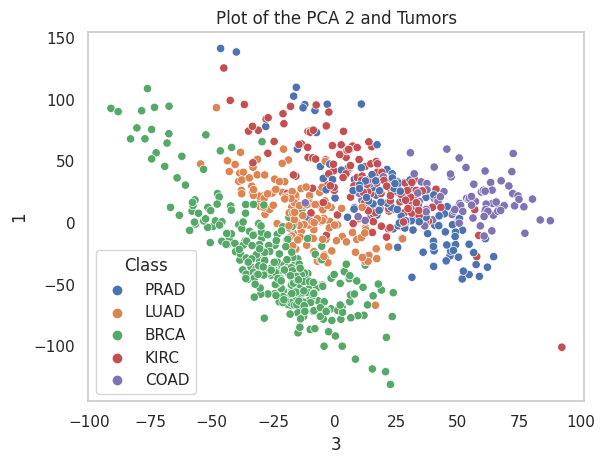

In [ ]:
sns.scatterplot(x=3,y=1, hue = "Class",data=df_pca)
plt.grid()
plt.title("Plot of the PCA 2 and Tumors")

### 2.2 Data Preparation:

In [ ]:
# Split the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(
    X_pca,
    ICMR_filtered_data['Class'],
    test_size=0.2
)

# Fit and transform the training data
scaled_train_x = scaler.fit_transform(train_x)

# Transform the test data using the same scaler
scaled_test_x = scaler.transform(test_x)


# Encoding
labelencoder = LabelEncoder()
train_labels_encoded = labelencoder.fit_transform(train_y)
test_labels_encoded = labelencoder.transform(test_y)  # Use transform, not fit_transform for the test set


# One-hot encoding
train_labels = to_categorical(train_labels_encoded)
test_labels = to_categorical(test_labels_encoded)




array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [ ]:
# # Drop rows with null values from the training set
# scaled_train_x = scaled_train_x[~np.isnan(scaled_train_x).any(axis=1)]
# train_labels_encoded = train_labels_encoded[~np.isnan(scaled_train_x).any(axis=1)]

# # Drop rows with null values from the test set
# scaled_test_x = scaled_test_x[~np.isnan(scaled_test_x).any(axis=1)]
# test_labels_encoded = test_labels_encoded[~np.isnan(scaled_test_x).any(axis=1)]


## 3. Model Fitting

In [ ]:
# Example of creating instances of multi-class classification models
logistic_regression = LogisticRegression(multi_class='ovr')
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC(decision_function_shape='ovr', probability= True)
k_neighbors = KNeighborsClassifier()
naive_bayes = GaussianNB()

# Create instances using OneVsRestClassifier for models that don't inherently support multi-class
logistic_regression_ovr = OneVsRestClassifier(LogisticRegression())
decision_tree_ovr = OneVsRestClassifier(DecisionTreeClassifier())

xgboost_classifier = XGBClassifier(tree_method = 'gpu_hist')

# logistic_regression_ovr, decision_tree_ovr

model_list = [
        logistic_regression, decision_tree, random_forest, svc,
        k_neighbors, naive_bayes, xgboost_classifier
    ]

In [ ]:
# Assuming you have defined scaled_train_x, train_y, scaled_test_x, and test_y

def model_training(model, scaled_train_x, train_y):
    model.fit(scaled_train_x, train_y)
    return model

def test_model(model, scaled_test_x, test_y):
    pred_y = model.predict(scaled_test_x)
    accuracy = accuracy_score(test_y, pred_y)
    print(f'Accuracy of model: {accuracy:.2f}')

    plt.figure(figsize = (10,6))
    # Create a heatmap of the confusion matrix using Seaborn
    cm = confusion_matrix(test_y, pred_y)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    cr = classification_report(test_y, pred_y)
    print(f"Classification Report:\n{cr}")

def auc_roc(model, test_x, test_y):
    # Get predicted probabilities for each class
    pred_y_probs = model.predict_proba(test_x)

    # Binarize the labels for multi-class ROC curves
    n_classes = len(np.unique(test_y))
    test_y_bin = label_binarize(test_y, classes=np.unique(test_y))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], pred_y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    # Plot ROC curves
    plt.figure(figsize=(10, 6))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc="lower right")
    plt.show()

def accuracy_of_classes(model, scaled_test_x, test_y):
    pred_y = model.predict(scaled_test_x)
    cm = confusion_matrix(test_y, pred_y)
    class_indices = np.unique(test_y)
    class_accuracies = {}

    for class_index in class_indices:
        true_positive = cm[class_index, class_index]
        total_actual = np.sum(cm[class_index, :])
        accuracy = true_positive / total_actual
        class_accuracies[class_index] = accuracy

    print("Class-wise Accuracies:")
    for class_index, accuracy in class_accuracies.items():
        print(f"Class {class_index}: {accuracy:.2f}")

def model_performance(model, scaled_train_x, train_y, scaled_test_x, test_y):
    model_trained = model_training(model, scaled_train_x, train_y)
    test_model(model_trained, scaled_test_x, test_y)
    auc_roc(model_trained, scaled_test_x, test_y)
    accuracy_of_classes(model_trained, scaled_test_x, test_y)



Model Progress:   0%|          | 0/7 [00:00<?, ?it/s]

MODEL NAME: LogisticRegression(multi_class='ovr')/nAccuracy of model: 0.83


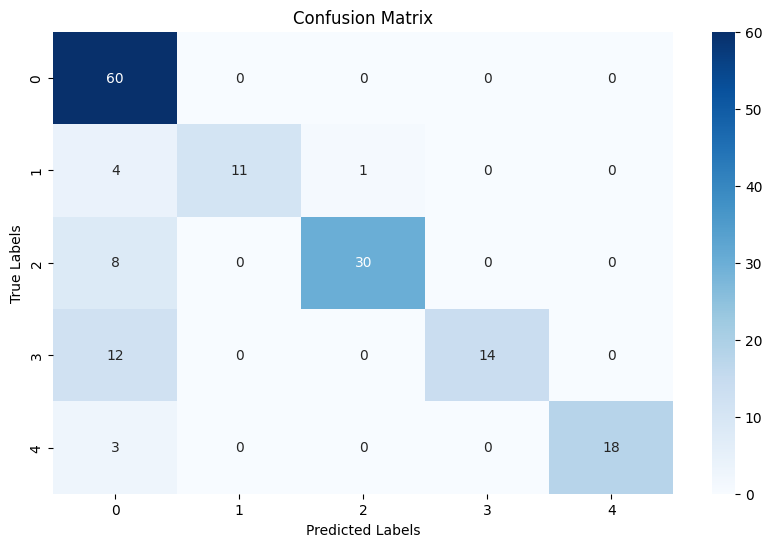

Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        60
           1       1.00      0.69      0.81        16
           2       0.97      0.79      0.87        38
           3       1.00      0.54      0.70        26
           4       1.00      0.86      0.92        21

    accuracy                           0.83       161
   macro avg       0.93      0.77      0.82       161
weighted avg       0.88      0.83      0.82       161



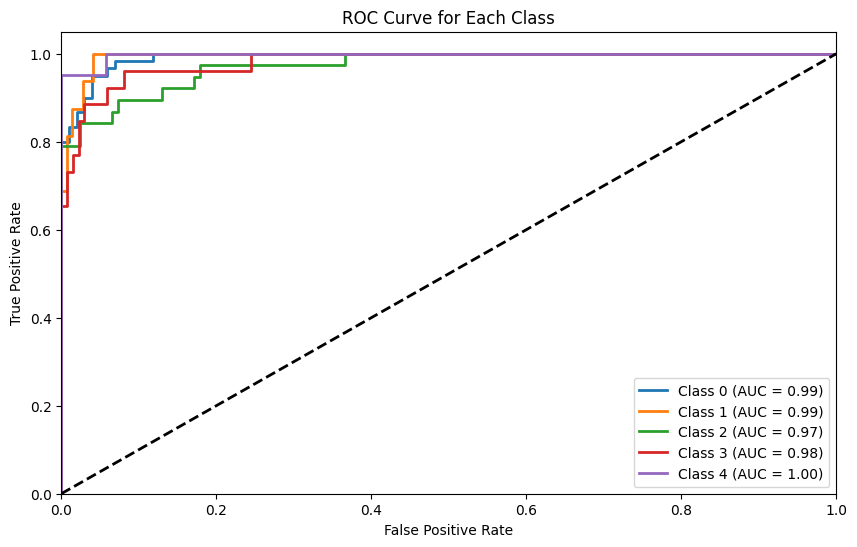

Model Progress:  14%|█▍        | 1/7 [00:00<00:03,  1.56it/s]

Class-wise Accuracies:
Class 0: 1.00
Class 1: 0.69
Class 2: 0.79
Class 3: 0.54
Class 4: 0.86
MODEL NAME: DecisionTreeClassifier()/nAccuracy of model: 0.87


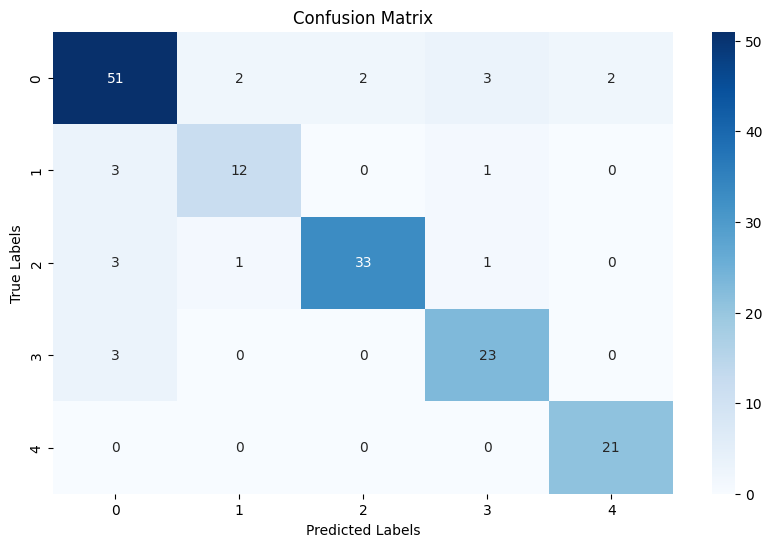

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.80      0.75      0.77        16
           2       0.94      0.87      0.90        38
           3       0.82      0.88      0.85        26
           4       0.91      1.00      0.95        21

    accuracy                           0.87       161
   macro avg       0.87      0.87      0.87       161
weighted avg       0.87      0.87      0.87       161



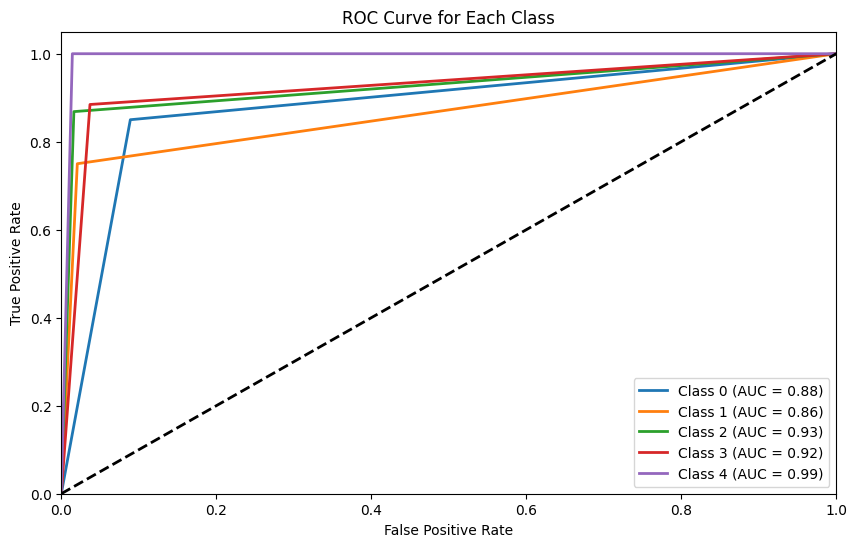

Model Progress:  29%|██▊       | 2/7 [00:01<00:03,  1.27it/s]

Class-wise Accuracies:
Class 0: 0.85
Class 1: 0.75
Class 2: 0.87
Class 3: 0.88
Class 4: 1.00
MODEL NAME: RandomForestClassifier()/nAccuracy of model: 0.89


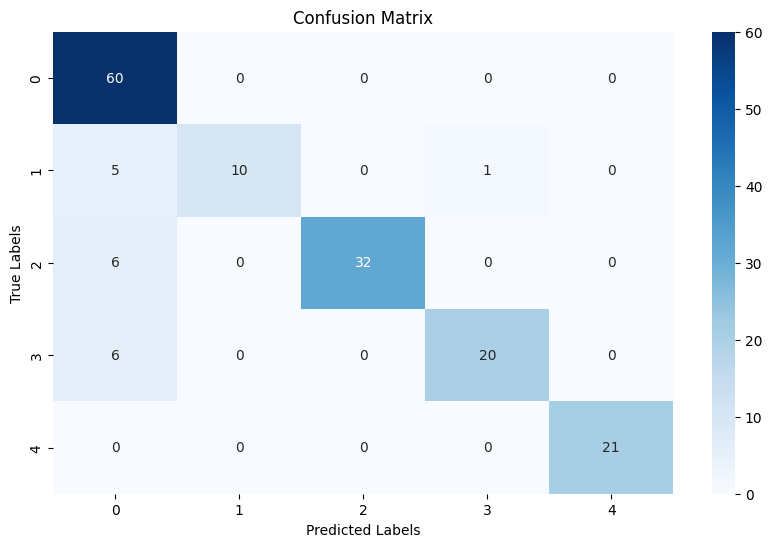

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        60
           1       1.00      0.62      0.77        16
           2       1.00      0.84      0.91        38
           3       0.95      0.77      0.85        26
           4       1.00      1.00      1.00        21

    accuracy                           0.89       161
   macro avg       0.95      0.85      0.88       161
weighted avg       0.91      0.89      0.89       161



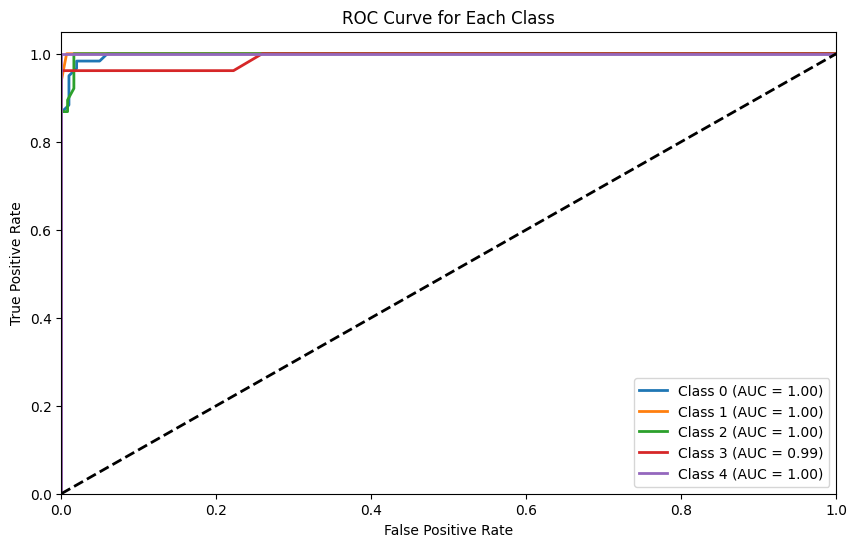

Model Progress:  43%|████▎     | 3/7 [00:03<00:04,  1.12s/it]

Class-wise Accuracies:
Class 0: 1.00
Class 1: 0.62
Class 2: 0.84
Class 3: 0.77
Class 4: 1.00
MODEL NAME: SVC(probability=True)/nAccuracy of model: 0.57


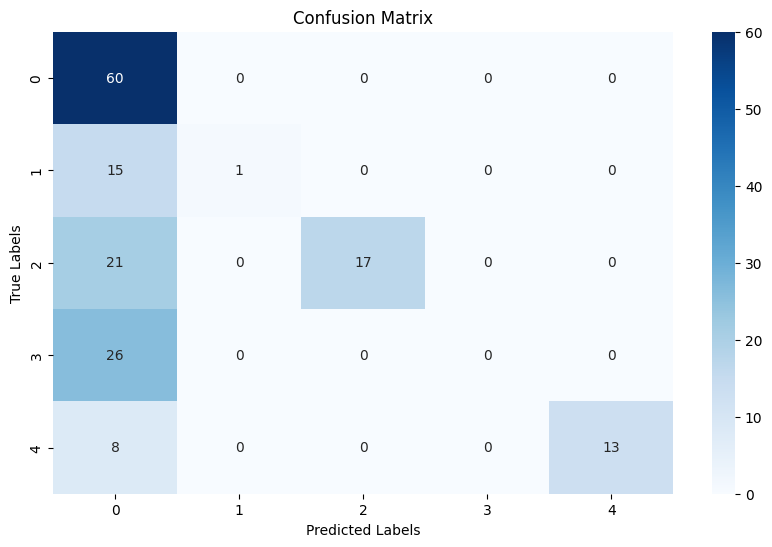

Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        60
           1       1.00      0.06      0.12        16
           2       1.00      0.45      0.62        38
           3       0.00      0.00      0.00        26
           4       1.00      0.62      0.76        21

    accuracy                           0.57       161
   macro avg       0.69      0.43      0.43       161
weighted avg       0.64      0.57      0.49       161



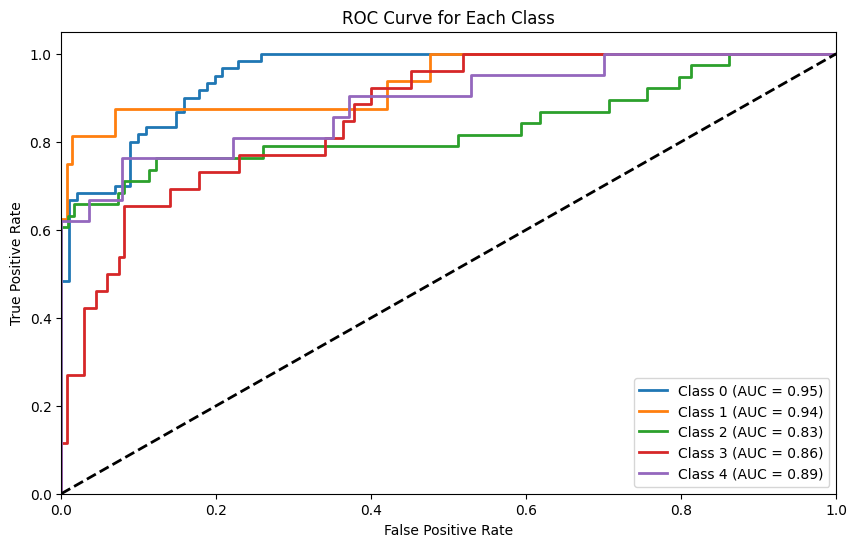

Model Progress:  57%|█████▋    | 4/7 [00:04<00:03,  1.25s/it]

Class-wise Accuracies:
Class 0: 1.00
Class 1: 0.06
Class 2: 0.45
Class 3: 0.00
Class 4: 0.62
MODEL NAME: KNeighborsClassifier()/nAccuracy of model: 0.25


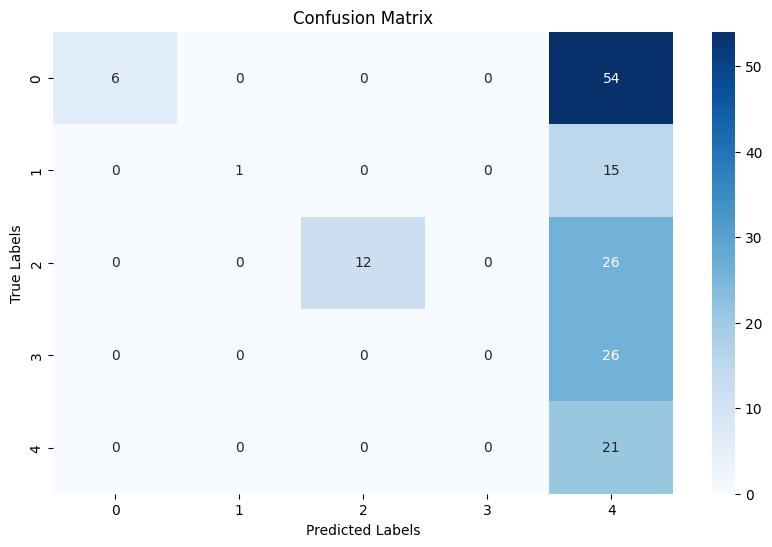

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        60
           1       1.00      0.06      0.12        16
           2       1.00      0.32      0.48        38
           3       0.00      0.00      0.00        26
           4       0.15      1.00      0.26        21

    accuracy                           0.25       161
   macro avg       0.63      0.30      0.21       161
weighted avg       0.73      0.25      0.23       161



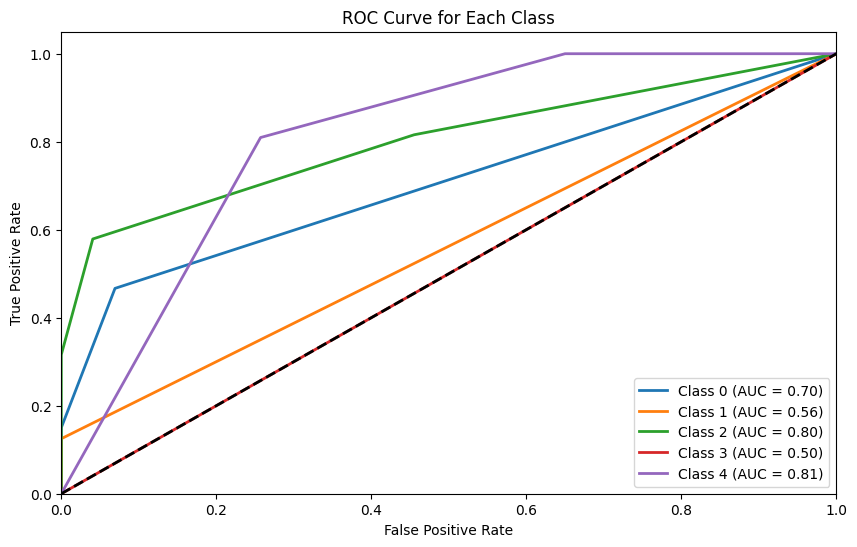

Model Progress:  71%|███████▏  | 5/7 [00:05<00:02,  1.02s/it]

Class-wise Accuracies:
Class 0: 0.10
Class 1: 0.06
Class 2: 0.32
Class 3: 0.00
Class 4: 1.00
MODEL NAME: GaussianNB()/nAccuracy of model: 0.63


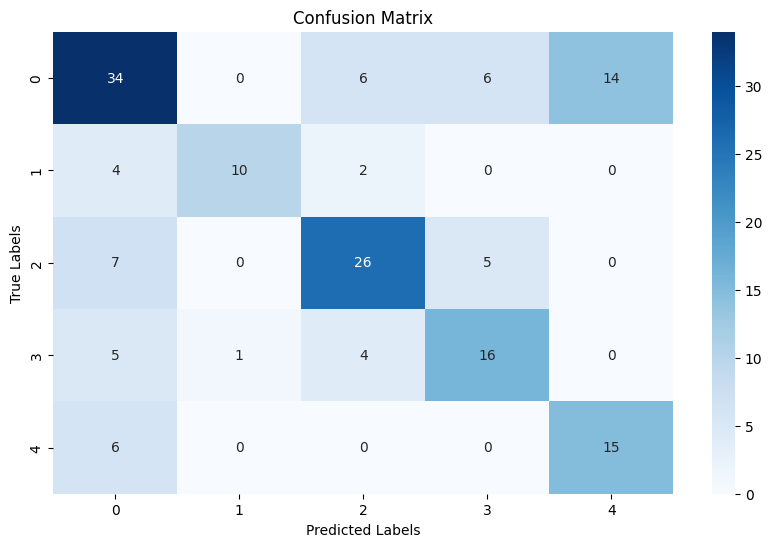

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        60
           1       0.91      0.62      0.74        16
           2       0.68      0.68      0.68        38
           3       0.59      0.62      0.60        26
           4       0.52      0.71      0.60        21

    accuracy                           0.63       161
   macro avg       0.66      0.64      0.64       161
weighted avg       0.64      0.63      0.63       161



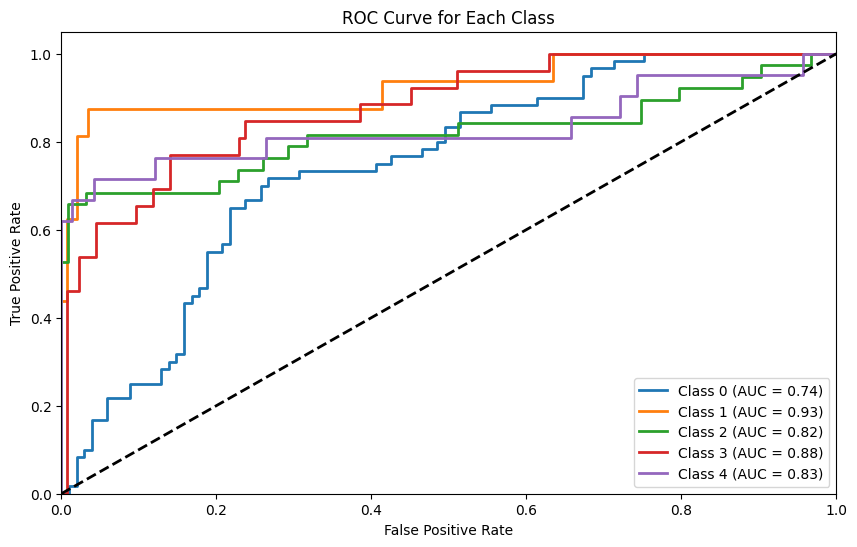

Model Progress:  86%|████████▌ | 6/7 [00:05<00:00,  1.14it/s]

Class-wise Accuracies:
Class 0: 0.57
Class 1: 0.62
Class 2: 0.68
Class 3: 0.62
Class 4: 0.71
MODEL NAME: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)/nAccuracy of model: 0.98


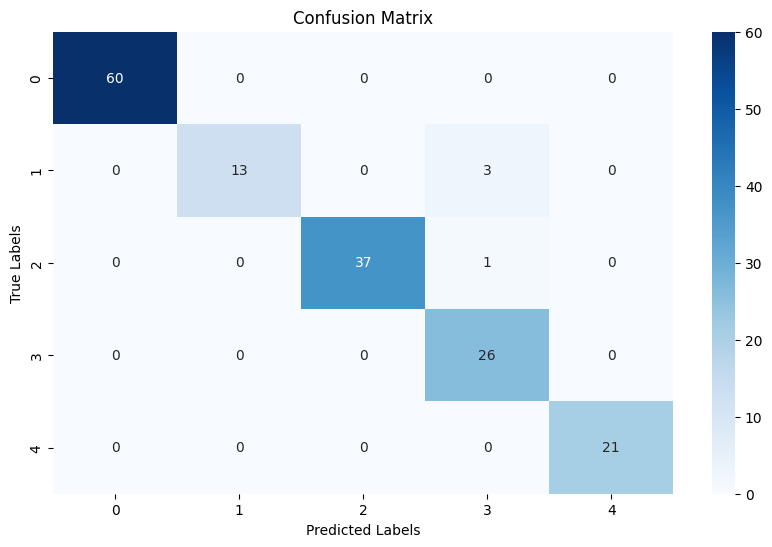

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.81      0.90        16
           2       1.00      0.97      0.99        38
           3       0.87      1.00      0.93        26
           4       1.00      1.00      1.00        21

    accuracy                           0.98       161
   macro avg       0.97      0.96      0.96       161
weighted avg       0.98      0.98      0.98       161



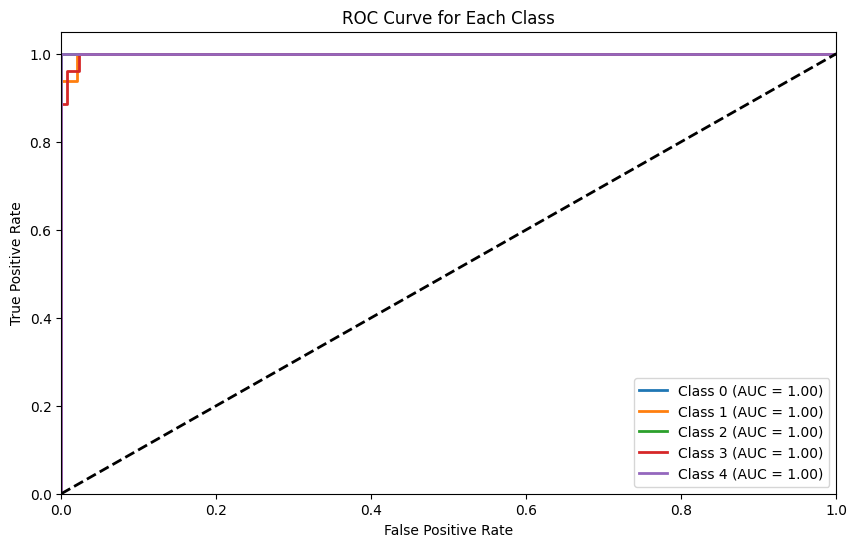

Model Progress: 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]

Class-wise Accuracies:
Class 0: 1.00
Class 1: 0.81
Class 2: 0.97
Class 3: 1.00
Class 4: 1.00


In [ ]:
for model in tqdm(model_list, desc="Model Progress"):
  print("MODEL NAME:",model,end ='/n')
  model_performance(model, scaled_train_x, train_labels_encoded, scaled_test_x, test_labels_encoded)

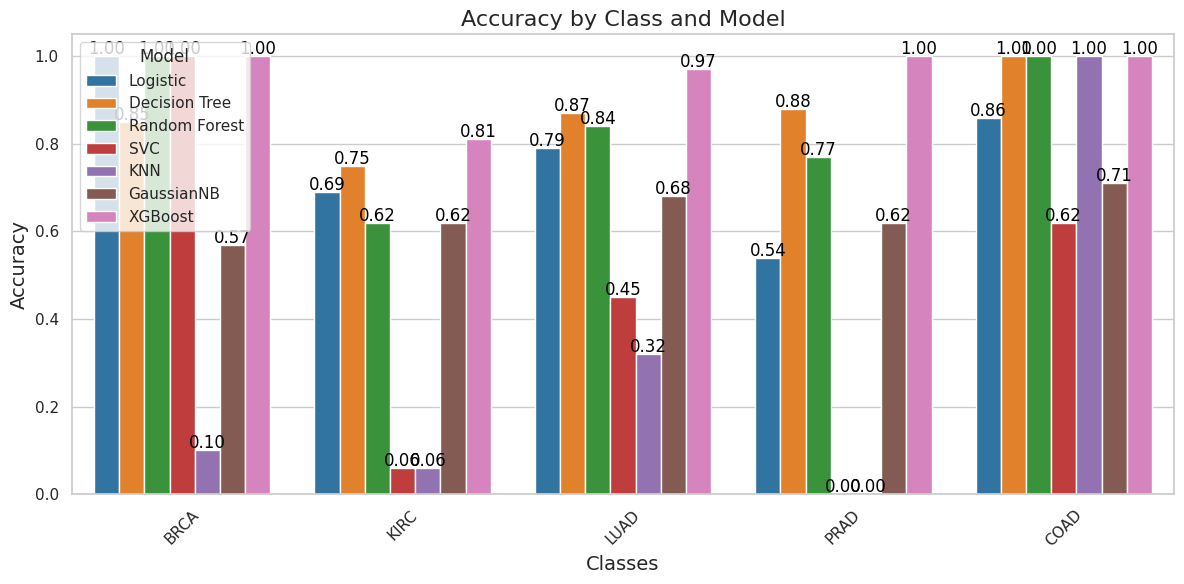

In [ ]:

# Define the class names and models
class_names = ["BRCA", "KIRC", "LUAD", "PRAD", "COAD"]
model_names = ["Logistic", "Decision Tree", "Random Forest", "SVC", "KNN", "GaussianNB", "XGBoost"]

# Define the accuracy values for each class and model
accuracy_data = {
    "Logistic": [1.00, 0.69, 0.79, 0.54, 0.86],
    "Decision Tree": [0.85, 0.75, 0.87, 0.88, 1.00],
    "Random Forest": [1.00, 0.62, 0.84, 0.77, 1.00],
    "SVC": [1.00, 0.06, 0.45, 0.00, 0.62],
    "KNN": [0.10, 0.06, 0.32, 0.00, 1.00],
    "GaussianNB": [0.57, 0.62, 0.68, 0.62, 0.71],
    "XGBoost": [1.00, 0.81, 0.97, 1.00, 1.00]
}

# Create a DataFrame for seaborn
df = pd.DataFrame(accuracy_data)
df['Class'] = class_names
df = df.melt('Class', var_name='Model', value_name='Accuracy')

# Set the color palette
sns.set_palette("tab10")

# Create a grouped barplot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Class', y='Accuracy', hue='Model', data=df)
plt.title('Accuracy by Class and Model', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Show the legend
plt.legend(title='Model', title_fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Add accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


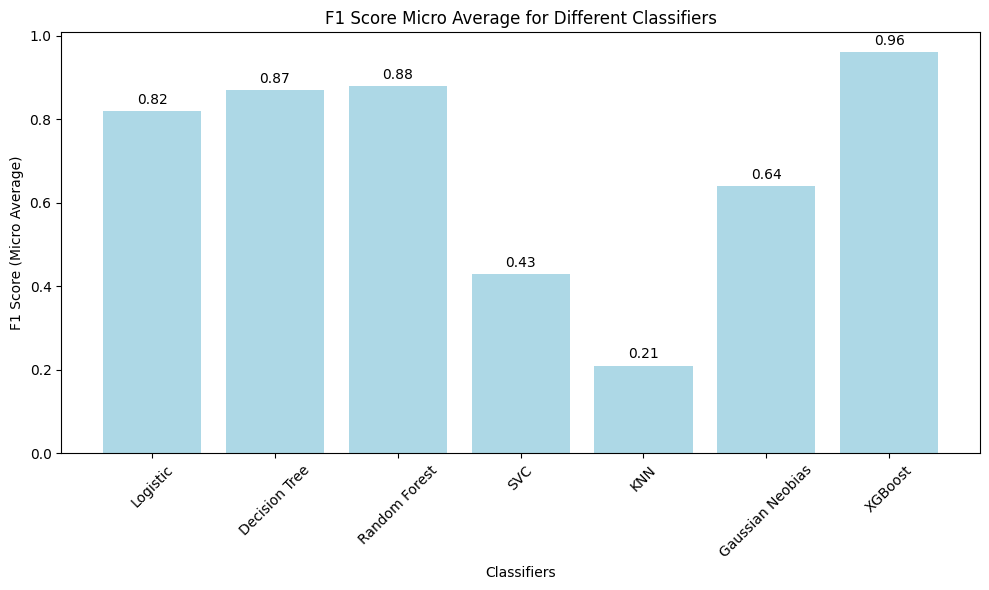

In [ ]:
# Define the classifiers and their corresponding F1 scores
classifiers = ['Logistic', 'Decision Tree', 'Random Forest', 'SVC', 'KNN', 'Gaussian Neobias', 'XGBoost']
f1_scores = [0.82, 0.87, 0.88, 0.43, 0.21, 0.64, 0.96]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, f1_scores, color='lightblue')
plt.xlabel('Classifiers')
plt.ylabel('F1 Score (Micro Average)')
plt.title('F1 Score Micro Average for Different Classifiers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding F1 score values on top of the bars
for bar, f1 in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, f1 + 0.01, f'{f1:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


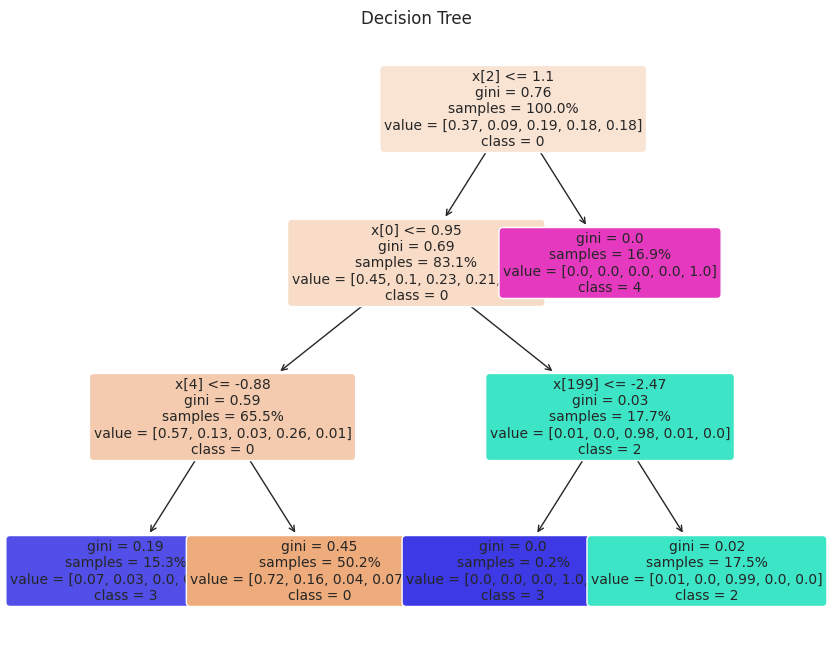

In [ ]:
# Initialize and fit the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Limit the maximum depth of the tree for better interpretability
decision_tree.set_params(max_depth=3)  # Adjust the depth as needed

decision_tree.fit(scaled_train_x, train_labels_encoded)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    decision_tree,
    filled=True,
    feature_names=None,  # Add feature names for better interpretation if available
    class_names=[str(i) for i in range(5)],  # Use class names as labels
    rounded=True,  # Use rounded corners for the nodes
    proportion=True,  # Show proportions in leaf nodes
    precision=2,  # Set the precision of displayed values
    fontsize=10  # Adjust font size for better readability
)

plt.title("Decision Tree")
plt.grid()

# Omit the legend for better clarity
# plt.legend()

plt.show()


In [ ]:
train_labels

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

## Discriminant Analysis:

Accuracy of model: 0.99


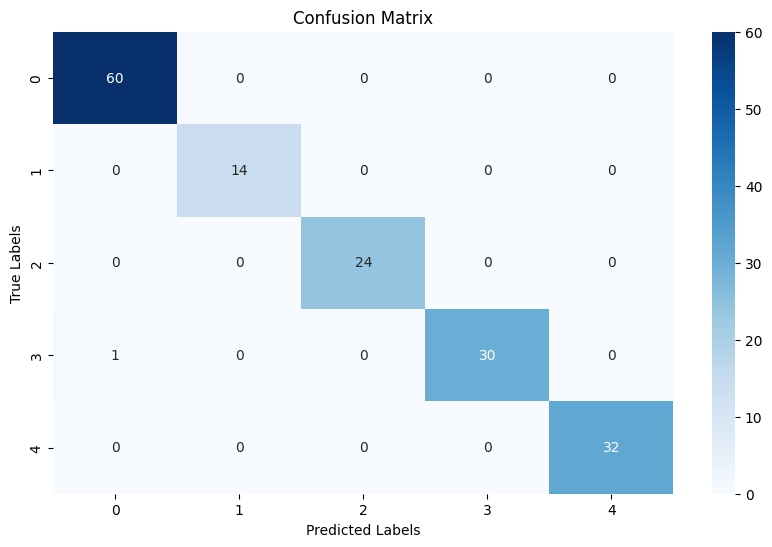

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24
           3       1.00      0.97      0.98        31
           4       1.00      1.00      1.00        32

    accuracy                           0.99       161
   macro avg       1.00      0.99      1.00       161
weighted avg       0.99      0.99      0.99       161



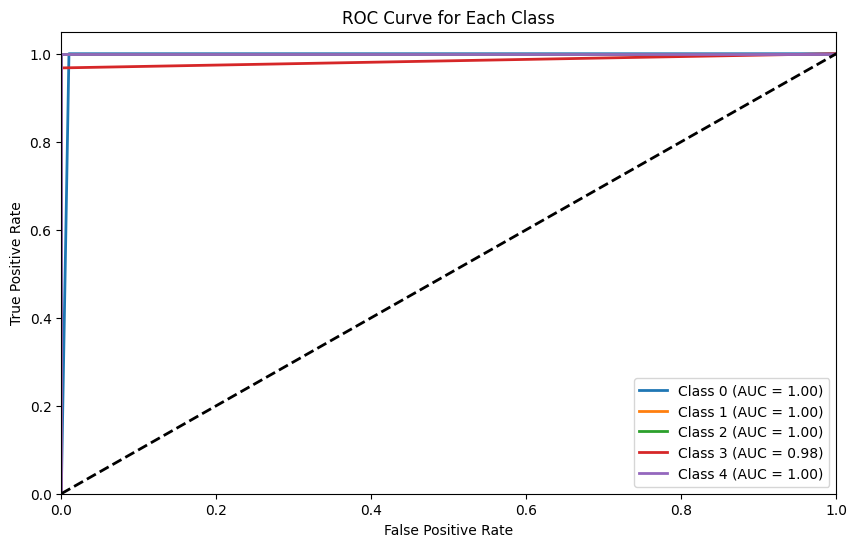

Class-wise Accuracies:
Class 0: 1.00
Class 1: 1.00
Class 2: 1.00
Class 3: 0.97
Class 4: 1.00


In [ ]:
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
## LDA
LDA_model = model_performance(LDA, scaled_train_x, train_labels_encoded, scaled_test_x, test_labels_encoded)

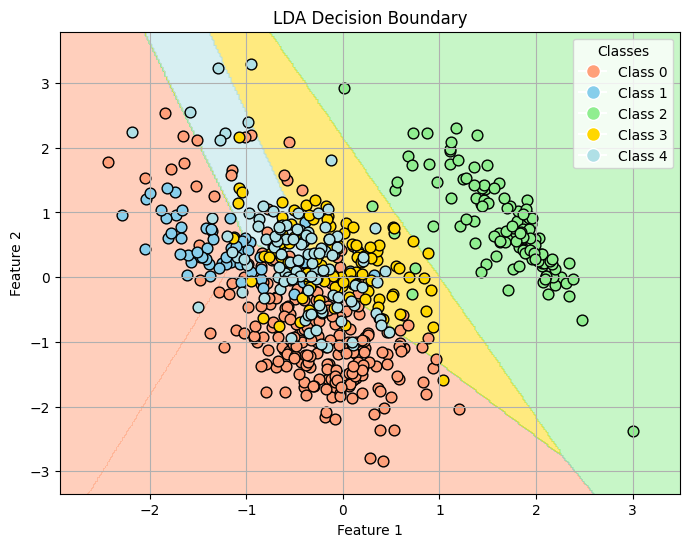

In [ ]:

# Define a custom colormap with distinct colors for each class
custom_cmap = ListedColormap(['#FFA07A', '#87CEEB', '#90EE90', '#FFD700', '#B0E0E6'])

# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
# Fit the LDA model on the appropriate data
lda.fit(scaled_train_x[:, :2], train_labels_encoded)

# Function to plot the decision boundary with a legend
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    labels = np.unique(y)
    colors = [custom_cmap.colors[i] for i in labels]

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.5)

    # Plot the data points with custom legend labels
    for label in labels:
        plt.scatter(X[y == label, 0], X[y == label, 1], c=colors[label], edgecolor='k', s=60, label=f'Class {label}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('LDA Decision Boundary')
    plt.grid()

    # Create a legend with custom color patches
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Class {label}', markersize=10, markerfacecolor=colors[label]) for label in labels]
    plt.legend(handles=legend_elements, title='Classes')

# Now, you can proceed to plot the decision boundary with the custom colormap and a legend
plot_decision_boundary(lda, scaled_train_x[:, :2], train_labels_encoded)
plt.show()


Accuracy of model: 0.43


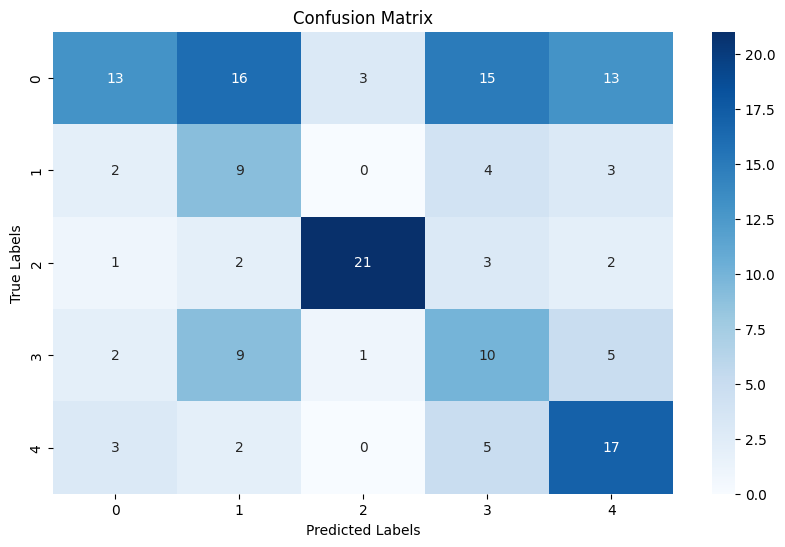

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.22      0.32        60
           1       0.24      0.50      0.32        18
           2       0.84      0.72      0.78        29
           3       0.27      0.37      0.31        27
           4       0.42      0.63      0.51        27

    accuracy                           0.43       161
   macro avg       0.48      0.49      0.45       161
weighted avg       0.53      0.43      0.43       161



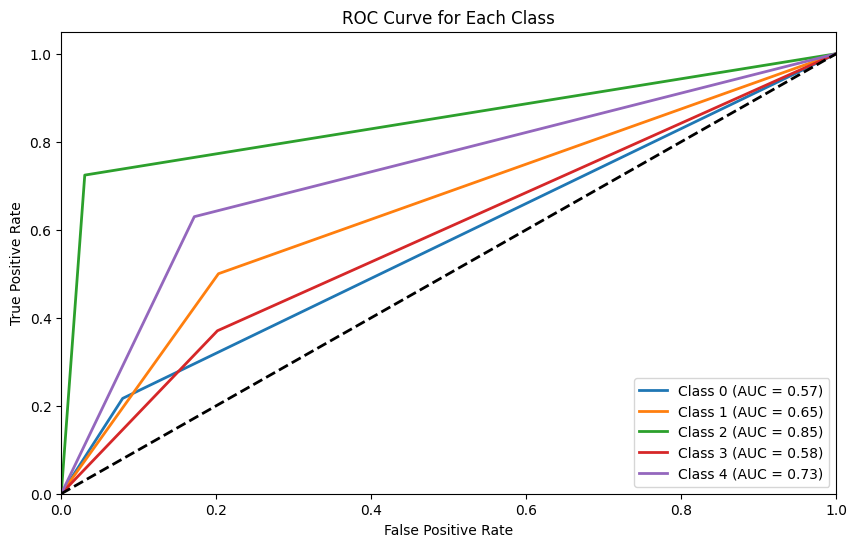

Class-wise Accuracies:
Class 0: 0.22
Class 1: 0.50
Class 2: 0.72
Class 3: 0.37
Class 4: 0.63


In [ ]:
## QDA
model_performance(QDA, scaled_train_x, train_labels_encoded, scaled_test_x, test_labels_encoded)

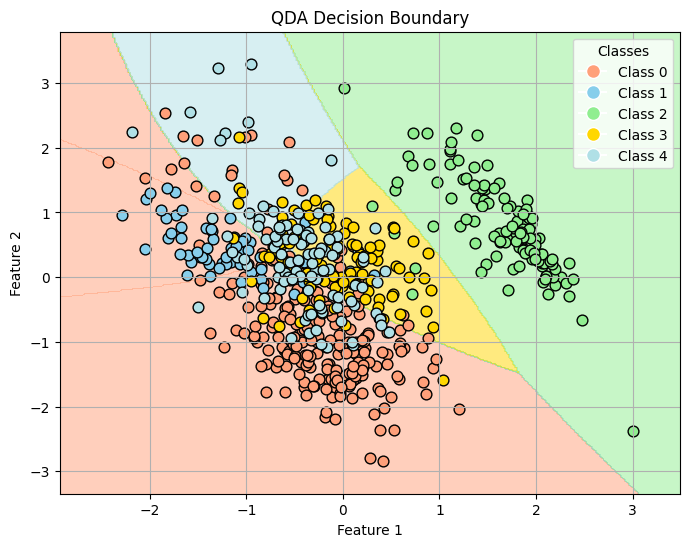

In [ ]:

# Define a custom colormap with distinct colors for each class
custom_cmap = ListedColormap(['#FFA07A', '#87CEEB', '#90EE90', '#FFD700', '#B0E0E6'])

# Initialize and fit the QDA model
QDA = QuadraticDiscriminantAnalysis()
# Fit the QDA model on the appropriate data
QDA.fit(scaled_train_x[:, :2], train_labels_encoded)

# Function to plot the decision boundary with a legend
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    labels = np.unique(y)
    colors = [custom_cmap.colors[i] for i in labels]

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.5)

    # Plot the data points with custom legend labels
    for label in labels:
        plt.scatter(X[y == label, 0], X[y == label, 1], c=colors[label], edgecolor='k', s=60, label=f'Class {label}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('QDA Decision Boundary')
    plt.grid()

    # Create a legend with custom color patches
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Class {label}', markersize=10, markerfacecolor=colors[label]) for label in labels]
    plt.legend(handles=legend_elements, title='Classes')

# Now, you can proceed to plot the decision boundary with the custom colormap and a legend
plot_decision_boundary(QDA, scaled_train_x[:, :2], train_labels_encoded)
plt.show()


## Bagging Classifier:

Bagginng Classifier with 10 base estimator, for different base estimator

Model Name: LogisticRegression(multi_class='ovr')/nAccuracy of model: 0.78


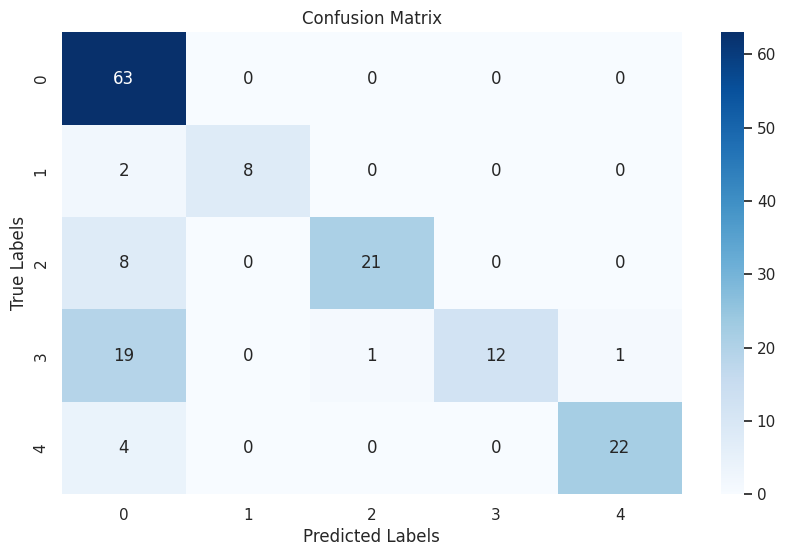

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.66      1.00      0.79        63
        COAD       1.00      0.80      0.89        10
        KIRC       0.95      0.72      0.82        29
        LUAD       1.00      0.36      0.53        33
        PRAD       0.96      0.85      0.90        26

    accuracy                           0.78       161
   macro avg       0.91      0.75      0.79       161
weighted avg       0.85      0.78      0.77       161

[1.0, 0.8, 0.7241379310344828, 0.36363636363636365, 0.8461538461538461]
Model Name: DecisionTreeClassifier()/nAccuracy of model: 0.96


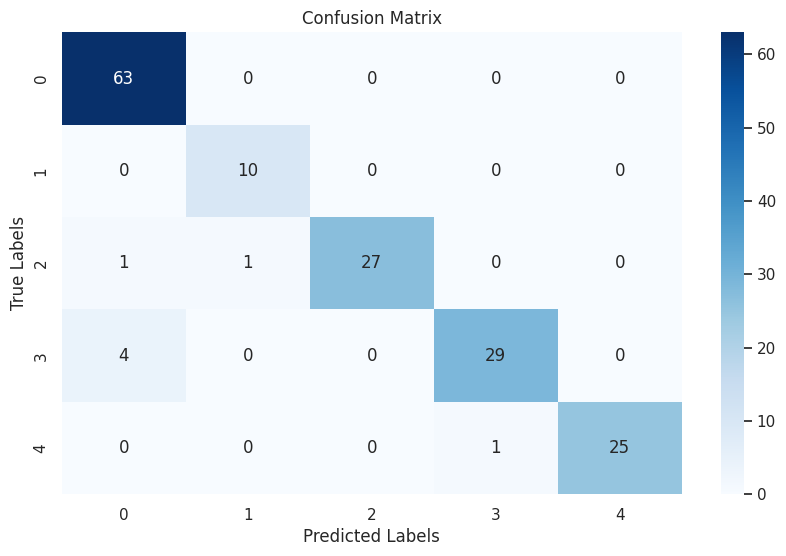

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.93      1.00      0.96        63
        COAD       0.91      1.00      0.95        10
        KIRC       1.00      0.93      0.96        29
        LUAD       0.97      0.88      0.92        33
        PRAD       1.00      0.96      0.98        26

    accuracy                           0.96       161
   macro avg       0.96      0.95      0.96       161
weighted avg       0.96      0.96      0.96       161

[1.0, 1.0, 0.9310344827586207, 0.8787878787878788, 0.9615384615384616]
Model Name: RandomForestClassifier()/nAccuracy of model: 0.87


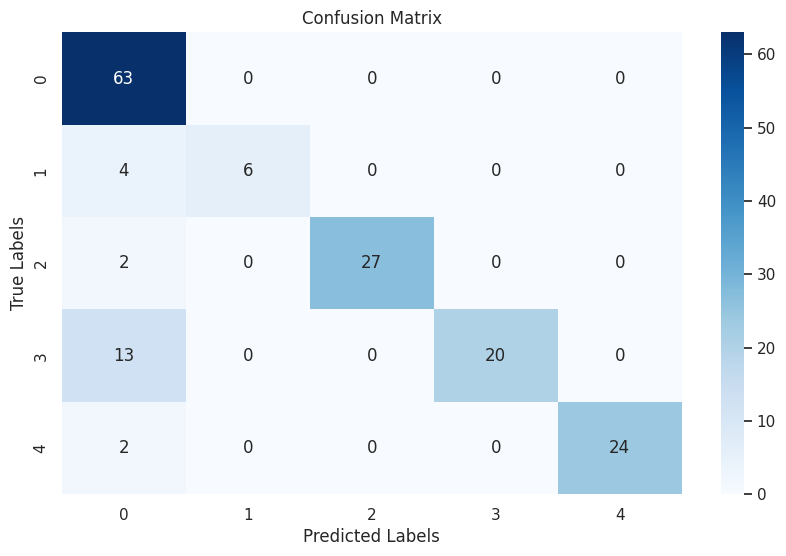

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.75      1.00      0.86        63
        COAD       1.00      0.60      0.75        10
        KIRC       1.00      0.93      0.96        29
        LUAD       1.00      0.61      0.75        33
        PRAD       1.00      0.92      0.96        26

    accuracy                           0.87       161
   macro avg       0.95      0.81      0.86       161
weighted avg       0.90      0.87      0.87       161

[1.0, 0.6, 0.9310344827586207, 0.6060606060606061, 0.9230769230769231]
Model Name: SVC(probability=True)/nAccuracy of model: 0.65


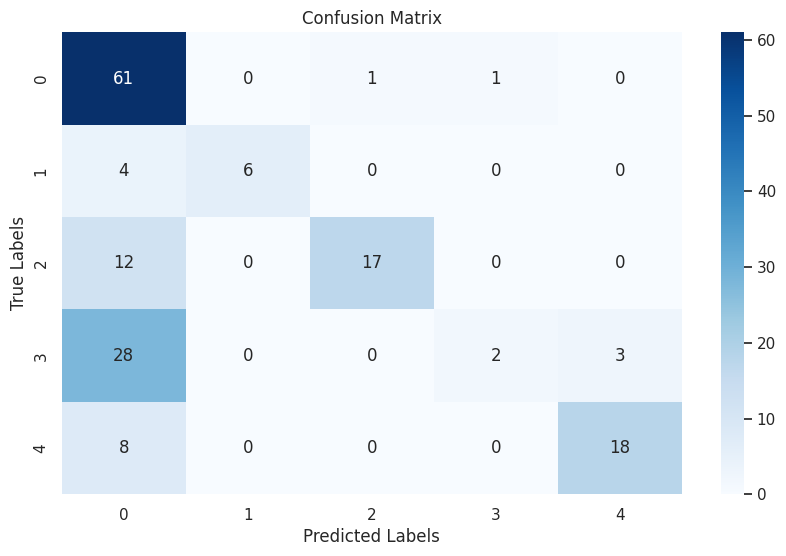

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.54      0.97      0.69        63
        COAD       1.00      0.60      0.75        10
        KIRC       0.94      0.59      0.72        29
        LUAD       0.67      0.06      0.11        33
        PRAD       0.86      0.69      0.77        26

    accuracy                           0.65       161
   macro avg       0.80      0.58      0.61       161
weighted avg       0.72      0.65      0.59       161

[0.9682539682539683, 0.6, 0.5862068965517241, 0.06060606060606061, 0.6923076923076923]
Model Name: KNeighborsClassifier()/nAccuracy of model: 0.27


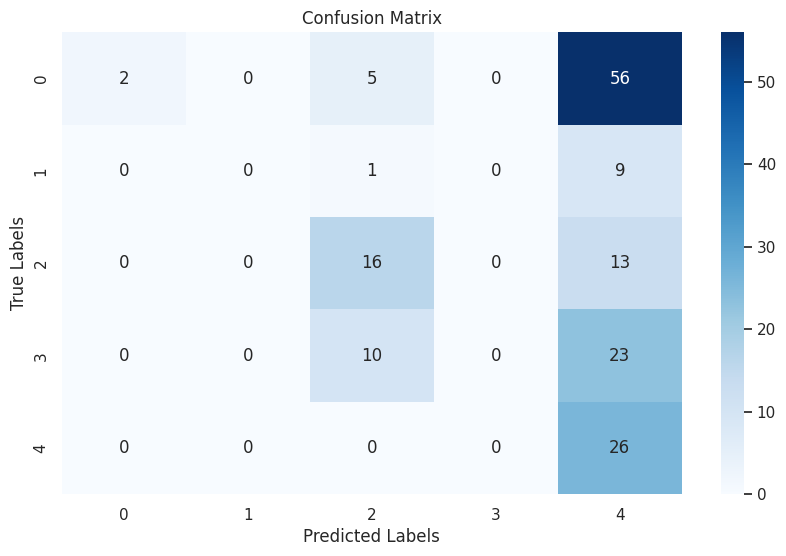

Classification Report:
              precision    recall  f1-score   support

        BRCA       1.00      0.03      0.06        63
        COAD       0.00      0.00      0.00        10
        KIRC       0.50      0.55      0.52        29
        LUAD       0.00      0.00      0.00        33
        PRAD       0.20      1.00      0.34        26

    accuracy                           0.27       161
   macro avg       0.34      0.32      0.19       161
weighted avg       0.51      0.27      0.17       161

[0.031746031746031744, 0.0, 0.5517241379310345, 0.0, 1.0]
Model Name: GaussianNB()/nAccuracy of model: 0.71


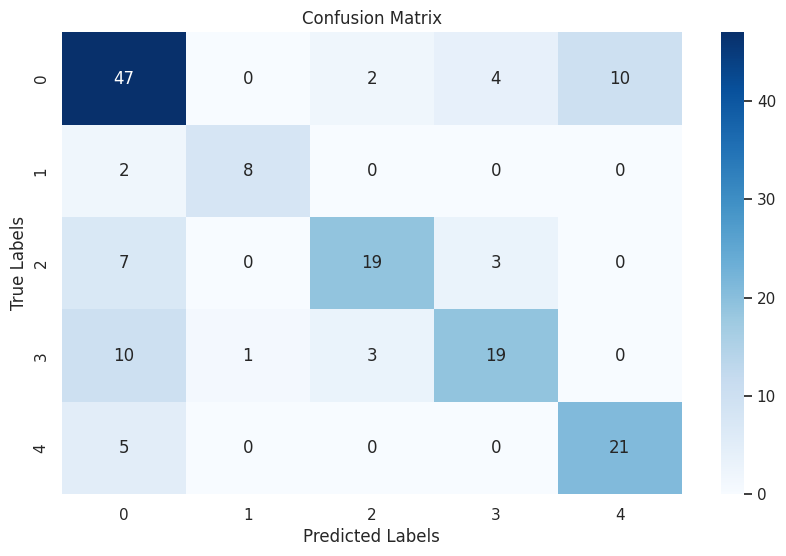

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.66      0.75      0.70        63
        COAD       0.89      0.80      0.84        10
        KIRC       0.79      0.66      0.72        29
        LUAD       0.73      0.58      0.64        33
        PRAD       0.68      0.81      0.74        26

    accuracy                           0.71       161
   macro avg       0.75      0.72      0.73       161
weighted avg       0.72      0.71      0.71       161

[0.746031746031746, 0.8, 0.6551724137931034, 0.5757575757575758, 0.8076923076923077]


In [ ]:
weak_learner = [
        logistic_regression, decision_tree, random_forest, svc,
        k_neighbors, naive_bayes
    ]


for learner in weak_learner:
  print("Model Name:", learner, end = '/n' )
  bag_model = BaggingClassifier(base_estimator= learner, n_estimators = 10, max_samples=1.0)
  model = model_training(bag_model, scaled_train_x, train_y)
  test_model(model, scaled_test_x, test_y)

  y_pred = model.predict(scaled_test_x)
  cm = confusion_matrix(test_y, y_pred)
  num_classes = len(np.unique(test_y))

  class_accuracies = []

  for class_index in range(num_classes):

      true_positive = cm[class_index, class_index]
      total_actual = np.sum(cm[class_index, :])
      accuracy = true_positive / total_actual if total_actual > 0 else 0  # Handle zero division
      class_accuracies.append(accuracy)

  print(class_accuracies)



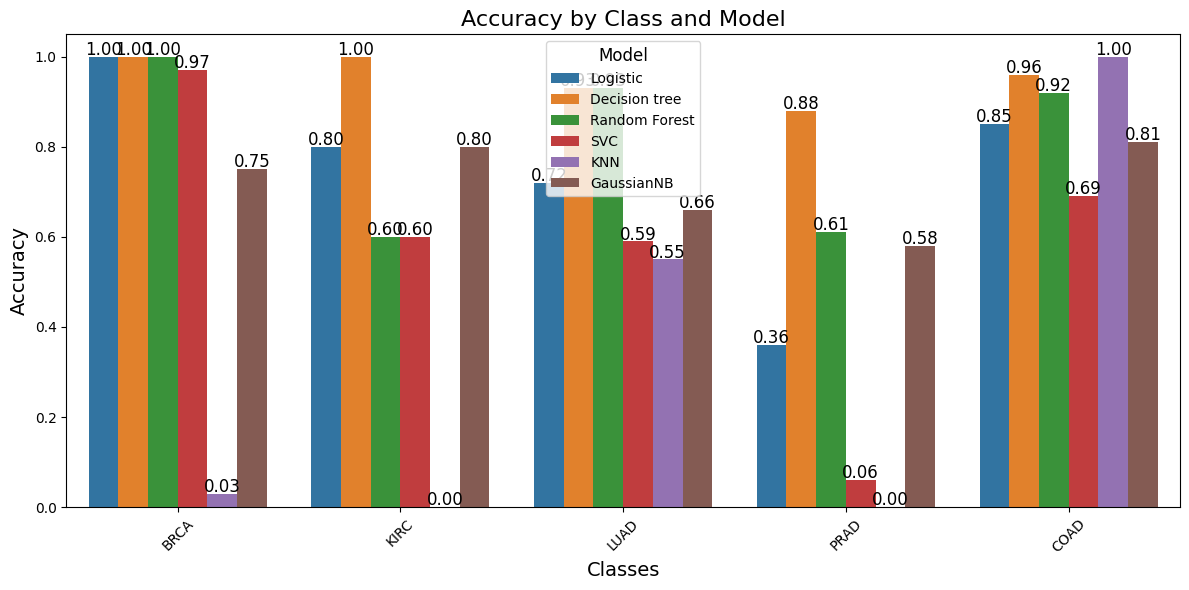

In [ ]:

# Define the class names and models
class_names = ["BRCA", "KIRC", "LUAD", "PRAD", "COAD"]
model_names = ["Logistic", "Decision Tree", "Random Forest", "SVC", "KNN", "GaussianNB"]

# Define the accuracy values for each class and model
accuracy_dict = {
    "Logistic": [1.0, 0.8, 0.72, 0.36, 0.85],
    "Decision tree": [1.0, 1.0, 0.93, 0.88, 0.96],
    "Random Forest": [1.0, 0.6, 0.93, 0.61, 0.92],
    "SVC": [0.97, 0.6, 0.59, 0.06, 0.69],
    "KNN": [0.03, 0.0, 0.55, 0.0, 1.0],
    "GaussianNB": [0.75, 0.8, 0.66, 0.58, 0.81]
}

# Create a DataFrame for seaborn
df = pd.DataFrame(accuracy_dict)
df['Class'] = class_names
df = df.melt('Class', var_name='Model', value_name='Accuracy')

# Set the color palette
sns.set_palette("tab10")

# Create a grouped barplot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Class', y='Accuracy', hue='Model', data=df)
plt.title('Accuracy by Class and Model', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Show the legend
plt.legend(title='Model', title_fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Add accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


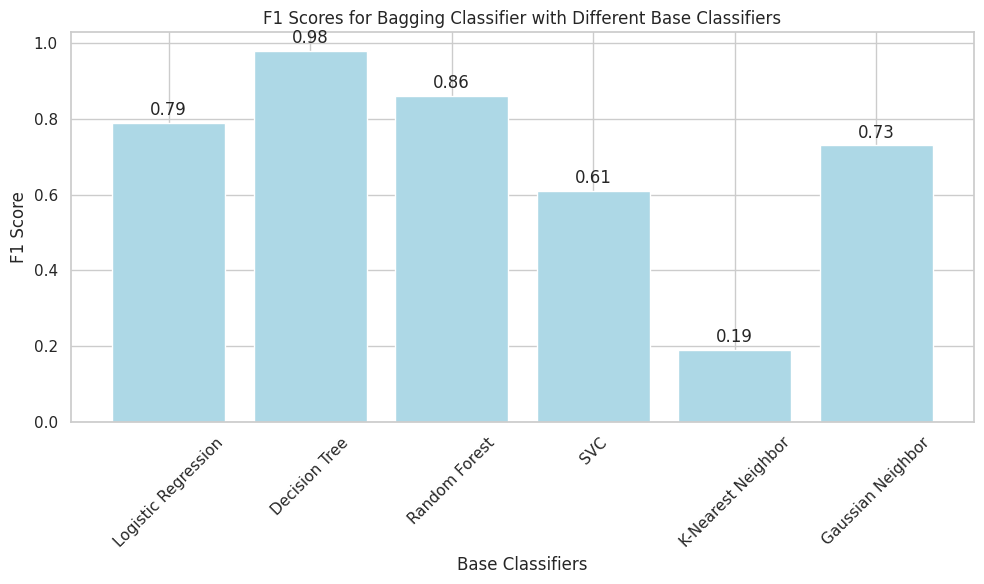

In [ ]:
# Define the base classifiers and their corresponding F1 scores
base_classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'K-Nearest Neighbor', 'Gaussian Neighbor']
f1_scores = [0.79, 0.98, 0.86, 0.61, 0.19, 0.73]

# Create a bar cha
plt.figure(figsize=(10, 6))
bars = plt.bar(base_classifiers, f1_scores, color='lightblue')
plt.xlabel('Base Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Bagging Classifier with Different Base Classifiers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding F1 score values on top of the bars
for bar, f1 in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, f1 + 0.01, f'{f1:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


##2 AdaBoost:

Model Name: DecisionTreeClassifier(max_depth=1)/nAccuracy of model: 0.77


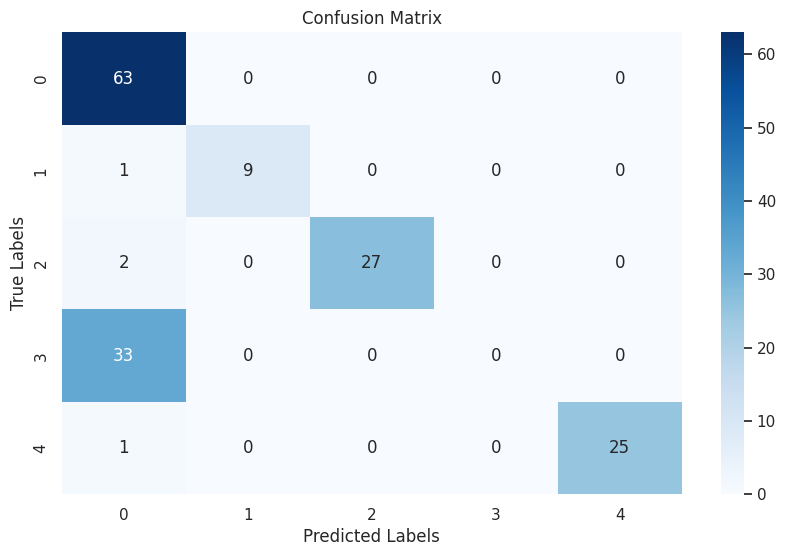

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.63      1.00      0.77        63
        COAD       1.00      0.90      0.95        10
        KIRC       1.00      0.93      0.96        29
        LUAD       0.00      0.00      0.00        33
        PRAD       1.00      0.96      0.98        26

    accuracy                           0.77       161
   macro avg       0.73      0.76      0.73       161
weighted avg       0.65      0.77      0.69       161

[1.0, 0.9, 0.9310344827586207, 0.0, 0.9615384615384616]
Model Name: DecisionTreeClassifier(max_depth=2)/nAccuracy of model: 0.87


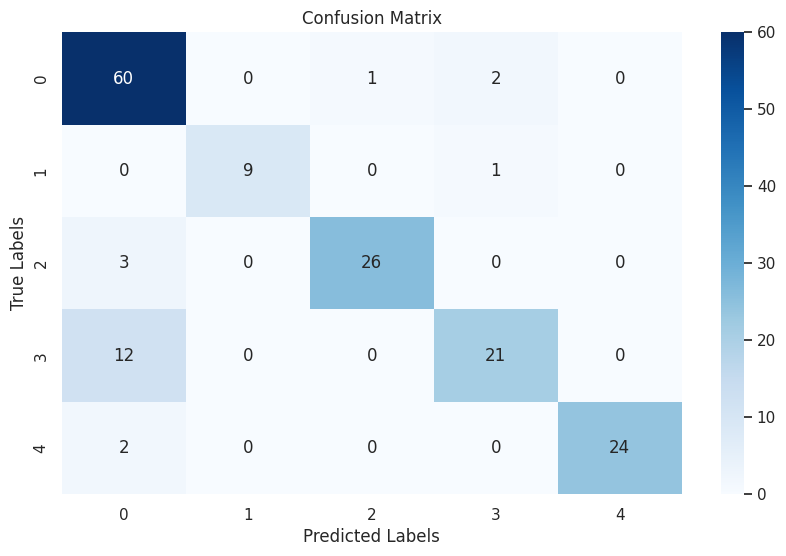

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.78      0.95      0.86        63
        COAD       1.00      0.90      0.95        10
        KIRC       0.96      0.90      0.93        29
        LUAD       0.88      0.64      0.74        33
        PRAD       1.00      0.92      0.96        26

    accuracy                           0.87       161
   macro avg       0.92      0.86      0.89       161
weighted avg       0.88      0.87      0.87       161

[0.9523809523809523, 0.9, 0.896551724137931, 0.6363636363636364, 0.9230769230769231]
Model Name: DecisionTreeClassifier(max_depth=3)/nAccuracy of model: 0.93


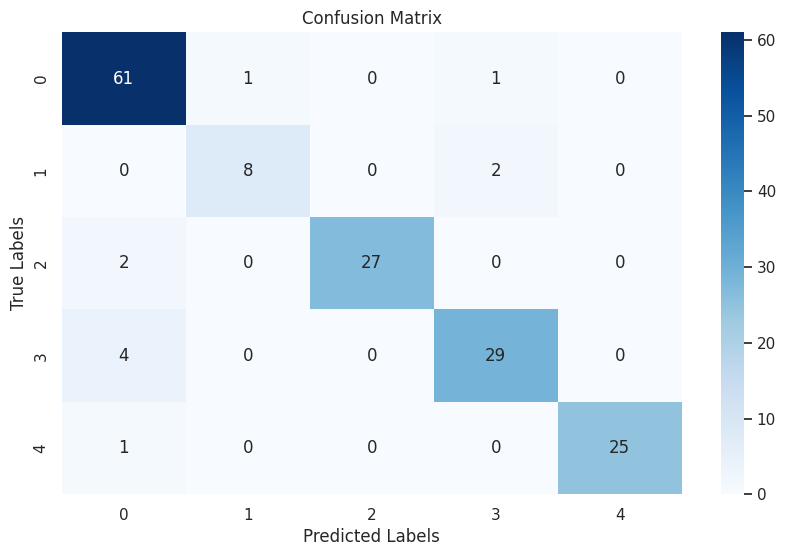

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.90      0.97      0.93        63
        COAD       0.89      0.80      0.84        10
        KIRC       1.00      0.93      0.96        29
        LUAD       0.91      0.88      0.89        33
        PRAD       1.00      0.96      0.98        26

    accuracy                           0.93       161
   macro avg       0.94      0.91      0.92       161
weighted avg       0.93      0.93      0.93       161

[0.9682539682539683, 0.8, 0.9310344827586207, 0.8787878787878788, 0.9615384615384616]


In [ ]:
weak_learner = [
    DecisionTreeClassifier(max_depth=1),  # Use decision trees as base estimators
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=3),
]

for learner in weak_learner:
    print("Model Name:", learner, end='/n')
    Adaboost_model = AdaBoostClassifier(base_estimator=learner, n_estimators=10, learning_rate=1.0)
    model = model_training(Adaboost_model, scaled_train_x, train_y)
    test_model(model, scaled_test_x, test_y)

    y_pred = model.predict(scaled_test_x)
    cm = confusion_matrix(test_y, y_pred)
    num_classes = len(np.unique(test_y))

    class_accuracies = []

    for class_index in range(num_classes):

        true_positive = cm[class_index, class_index]
        total_actual = np.sum(cm[class_index, :])
        accuracy = true_positive / total_actual if total_actual > 0 else 0  # Handle zero division
        class_accuracies.append(accuracy)

    print(class_accuracies)


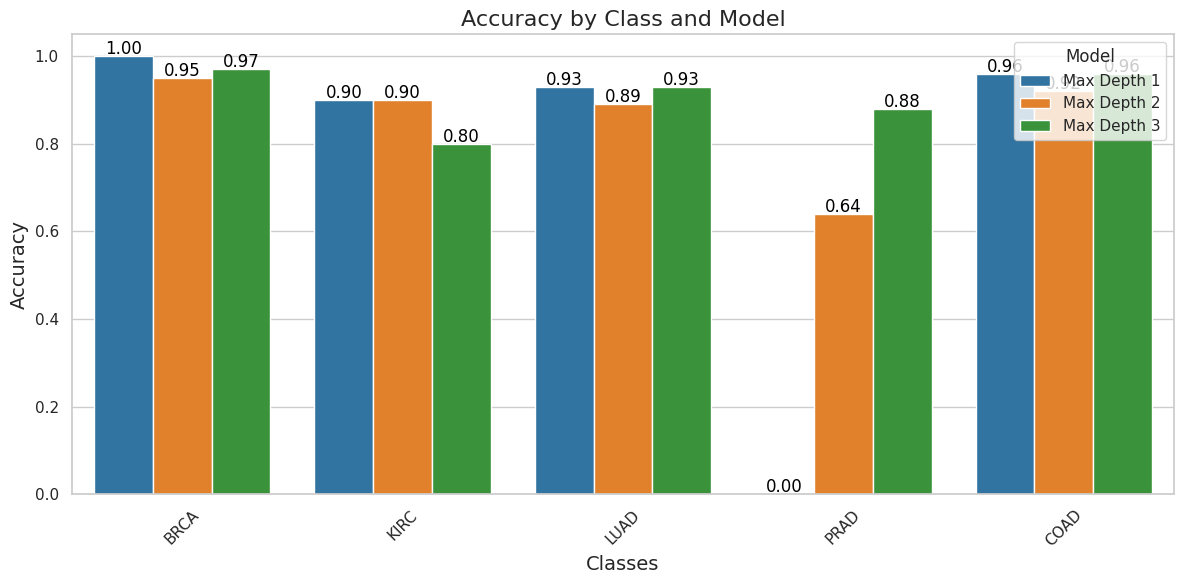

In [ ]:

# Define the class names and models
class_names = ["BRCA", "KIRC", "LUAD", "PRAD", "COAD"]
model_names = ["Max Depth 1", "Max Depth 2", "Max Depth 3"]

# Define the accuracy values for each class and model
accuracy_dict ={
    "Max Depth 1": [1.0, 0.9, 0.93, 0.0, 0.96],
    "Max Depth 2": [0.95, 0.9, 0.89, 0.64, 0.92],
    "Max Depth 3": [0.97, 0.8, 0.93, 0.88, 0.96]
}


# Create a DataFrame for seaborn
df = pd.DataFrame(accuracy_dict)
df['Class'] = class_names
df = df.melt('Class', var_name='Model', value_name='Accuracy')

# Set the color palette
sns.set_palette("tab10")

# Create a grouped barplot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Class', y='Accuracy', hue='Model', data=df)
plt.title('Accuracy by Class and Model', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Show the legend
plt.legend(title='Model', title_fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Add accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


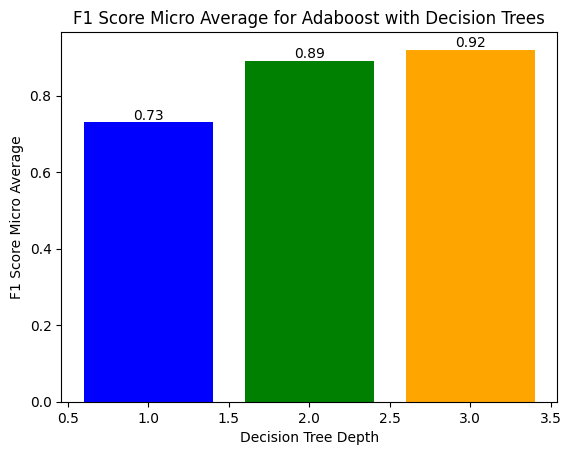

In [ ]:

# F1 score micro average values
f1_scores = [0.73, 0.89, 0.92]

# Decision tree depths
depths = [1, 2, 3]

# Create a bar plot
plt.bar(depths, f1_scores, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Decision Tree Depth')
plt.ylabel('F1 Score Micro Average')
plt.title('F1 Score Micro Average for Adaboost with Decision Trees')

# Add scores at the top of each bar
for i, score in enumerate(f1_scores):
    plt.text(depths[i], score, str(score), ha='center', va='bottom')

# Show the plot
plt.show()


## Fitting Neural Network:

In [ ]:
classes = len(np.unique(ICMR_data['Class']))

## startign with high complexity
model = Sequential()
model.add(layers.Dense( 64, activation = 'relu', input_shape = (train_x.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(classes, activation = 'sigmoid'))
## model compiling
model.compile(optimizer  = 'rmsprop', metrics = ['accuracy'], loss = 'categorical_crossentropy')
history = model.fit(train_x,train_labels, batch_size = 10, epochs = 40 , validation_data = (test_x,test_labels))



Epoch 1/40
64/64 [==============================] - 2s 8ms/step - loss: 7.3926 - accuracy: 0.2062 - val_loss: 1.3858 - val_accuracy: 0.4410
Epoch 2/40
64/64 [==============================] - 0s 7ms/step - loss: 4.1382 - accuracy: 0.2469 - val_loss: 1.2891 - val_accuracy: 0.4472
Epoch 3/40
64/64 [==============================] - 0s 7ms/step - loss: 3.0880 - accuracy: 0.2828 - val_loss: 1.2582 - val_accuracy: 0.5839
Epoch 4/40
64/64 [==============================] - 0s 6ms/step - loss: 2.4067 - accuracy: 0.3000 - val_loss: 1.2852 - val_accuracy: 0.6335
Epoch 5/40
64/64 [==============================] - 0s 7ms/step - loss: 2.1019 - accuracy: 0.3172 - val_loss: 1.2711 - val_accuracy: 0.6894
Epoch 6/40
64/64 [==============================] - 0s 6ms/step - loss: 1.7557 - accuracy: 0.3906 - val_loss: 1.1968 - val_accuracy: 0.7453
Epoch 7/40
64/64 [==============================] - 0s 6ms/step - loss: 1.6582 - accuracy: 0.3812 - val_loss: 1.1099 - val_accuracy: 0.8199
Epoch 8/40
64/64 [==

In [ ]:
model.save()

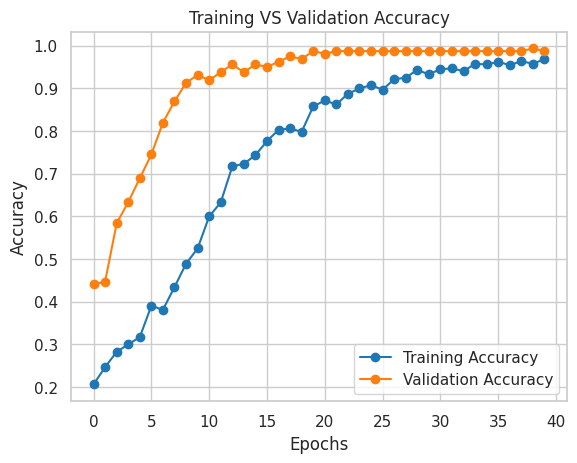

In [ ]:
# model.fit()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(40)

plt.plot(epochs, acc, 'o-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'o-', label='Validation Accuracy')

# plt.grid()
plt.title("Training VS Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


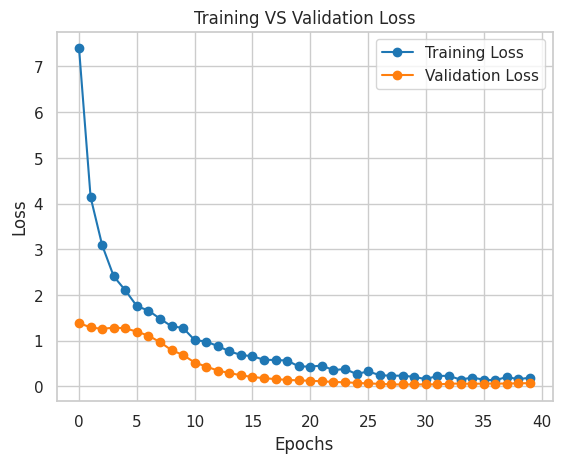

In [ ]:
# model.fit()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(40)

plt.plot(epochs, loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

# plt.grid()
plt.title("Training VS Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Assuming you have a Keras model named 'model'
# model.save('/content/drive/MyDrive/Multivariate Project: ICMR Cancer Data/ICMR.h5')

# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Multivariate Project: ICMR Cancer Data/ICMR.h5')

In [ ]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                33984     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)               

6/6 [==============================] - 0s 3ms/step


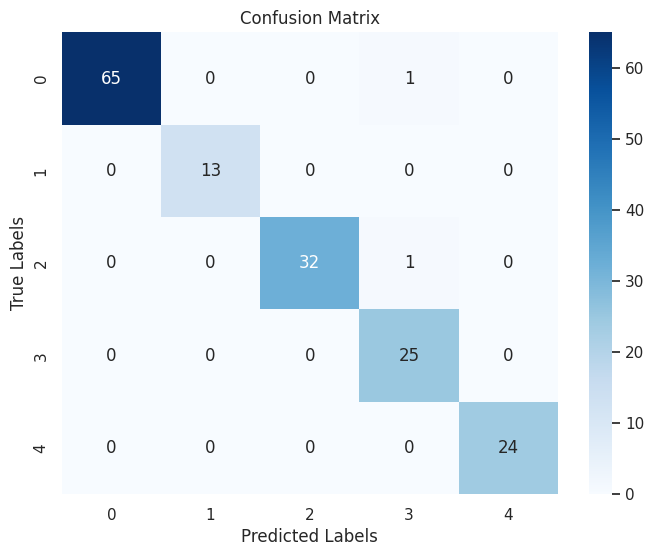

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       1.00      1.00      1.00        13
           2       1.00      0.97      0.98        33
           3       0.93      1.00      0.96        25
           4       1.00      1.00      1.00        24

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [ ]:
# Use the predict method to get class labels
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)
test_labels = labelencoder.transform(test_y)

# Calculate the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix")
plt.show()

# Calculate and print the classification report
report = classification_report(test_labels, y_pred)
print("Classification Report:")
print(report)


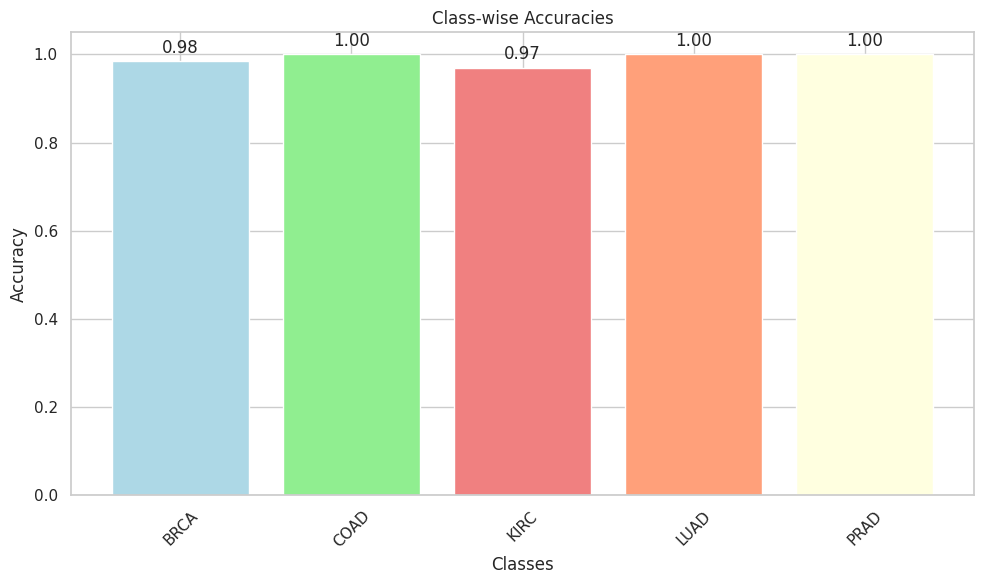

In [ ]:

# Calculate the class-wise accuracies
class_accuracies = []
for i in range(len(confusion)):
    accuracy = confusion[i, i] / sum(confusion[i, :])
    class_accuracies.append(accuracy)

# Define the class names
class_names = labelencoder.classes_

# Create a bar plot for class-wise accuracies with labels and custom colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightyellow']

plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, class_accuracies, color=colors)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracies')

# Adding accuracy values on top of the bars
for bar, acc in zip(bars, class_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()


## Cross Validation Neural Network:

In [ ]:


def create_neural_network(input_shape, num_classes):
    model = Sequential()
    model.add(layers.Input(shape=(input_shape,)))  # Specify the input shape as a tuple
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    # Model compiling
    model.compile(optimizer='rmsprop', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

    return model
from sklearn.metrics import confusion_matrix

def k_fold_cross_validation(train_x, train_labels, num_classes, n_splits=5, batch_size=10, epochs=20, random_state=42):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    accuracy_scores = []

    # Convert multilabel-indicator format to single-label
    train_labels_single = np.argmax(train_labels, axis=1)

    for train_index, val_index in kf.split(train_x, train_labels_single):
        train_data, val_data = train_x[train_index], train_x[val_index]
        train_labels_fold, val_labels_fold = train_labels_single[train_index], train_labels_single[val_index]

        model = create_neural_network(train_x.shape[1], num_classes)

        history = model.fit(train_data, train_labels_fold, batch_size=batch_size, epochs=epochs, validation_data=(val_data, val_labels_fold), verbose=0)

        val_pred = model.predict(val_data)
        val_pred_classes = np.argmax(val_pred, axis=1)

        cm = confusion_matrix(val_labels_fold, val_pred_classes)
        class_accuracy = cm.diagonal() / cm.sum(axis=1)

        accuracy_scores.append(class_accuracy)

    avg_class_accuracy = np.mean(accuracy_scores, axis=0)

    return avg_class_accuracy

# Example usage:
num_classes = 5  # Change this to the number of classes in your problem
avg_class_accuracy = k_fold_cross_validation(train_x, train_labels, num_classes)
print(f'Average Accuracy for Each Class: {avg_class_accuracy}')


4/4 [==============================] - 0s 4ms/step
Average Accuracy for Each Class: [1.         0.98571429 0.99090909 0.99130435 1.        ]


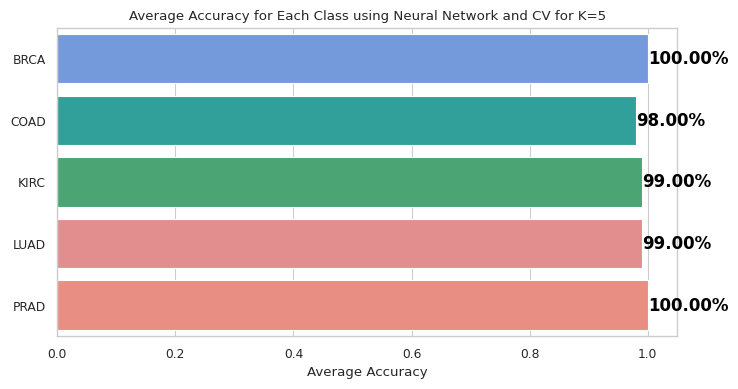

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# class_names is a list of class labels

# Replace class_names with labelencoder.classes_
num_classes = len(labelencoder.classes_)

avg_class_accuracy = [1, 0.98, 0.99, 0.99, 1]

# Define a custom color palette for each class
colors = ['cornflowerblue', 'lightseagreen', 'mediumseagreen', 'lightcoral', 'salmon']

# Set Seaborn style and context for improved aesthetics
sns.set(style="whitegrid", context="paper")

# Create a Seaborn horizontal bar plot for average accuracy
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
ax = sns.barplot(x=avg_class_accuracy, y=labelencoder.classes_, palette=colors)
plt.xlabel("Average Accuracy")
plt.title("Average Accuracy for Each Class using Neural Network and CV for K=5")

# Add accuracy values with improved formatting
for i, acc in enumerate(avg_class_accuracy):
    ax.text(acc, i, f"{acc*100:.2f}%", va='center', fontsize=12, color='black', weight='bold')

plt.show()
